# Data Cleaning / Preprocessing / Visualization 📊


## Load datset

In [73]:
from pathlib import Path
from scipy.stats import pearsonr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", context="notebook")
plt.rcParams["figure.figsize"] = (10, 5)

# Set path of the dataset
# If you got error with this. Just replace path with the path of your dataset
DATA_PATH = "Customer-Churn-Records.csv"

# Set dataframe
df = pd.read_csv(DATA_PATH)

# Drop unneeded columns
df = df.drop(columns=["RowNumber","CustomerId","Surname"])

# Format float to 5 decimal places
pd.set_option('display.float_format', '{:.5f}'.format)

## Data analysis/ Preprocessing

In [74]:
# check shape of the dataset
df.shape

(10000, 15)

In [75]:
# get information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

In [76]:
# varity of the dataset
df.nunique()

CreditScore            460
Geography                3
Gender                   2
Age                     70
Tenure                  11
Balance               6382
NumOfProducts            4
HasCrCard                2
IsActiveMember           2
EstimatedSalary       9999
Exited                   2
Complain                 2
Satisfaction Score       5
Card Type                4
Point Earned           785
dtype: int64

In [77]:
# check for missing values
df.isnull().sum()

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

จากข้อมูลจะเห็นได้ว่าหลังจากตัดข้อมูลที่ไม่จำเป็นออก (เลขแถว เลข ID ลูกค้า และ ชื่อลูกค้า) พบว่าไม่มีแถวไหนที่ว่างเลย

In [78]:
# Summary statistics
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000
mean,650.52880,38.92180,5.01280,76485.88929,1.53020,0.70550,0.51510,100090.23988,0.20380,0.20440,3.01380,606.51510
std,96.65330,10.48781,2.89217,62397.40520,0.58165,0.45584,0.49980,57510.49282,0.40284,0.40328,1.40592,225.92484
min,350.00000,18.00000,0.00000,0.00000,1.00000,0.00000,0.00000,11.58000,0.00000,0.00000,1.00000,119.00000
25%,584.00000,32.00000,3.00000,0.00000,1.00000,0.00000,0.00000,51002.11000,0.00000,0.00000,2.00000,410.00000
50%,652.00000,37.00000,5.00000,97198.54000,1.00000,1.00000,1.00000,100193.91500,0.00000,0.00000,3.00000,605.00000
75%,718.00000,44.00000,7.00000,127644.24000,2.00000,1.00000,1.00000,149388.24750,0.00000,0.00000,4.00000,801.00000
max,850.00000,92.00000,10.00000,250898.09000,4.00000,1.00000,1.00000,199992.48000,1.00000,1.00000,5.00000,1000.00000


Categorical columns: ['Geography', 'Gender', 'Card Type']


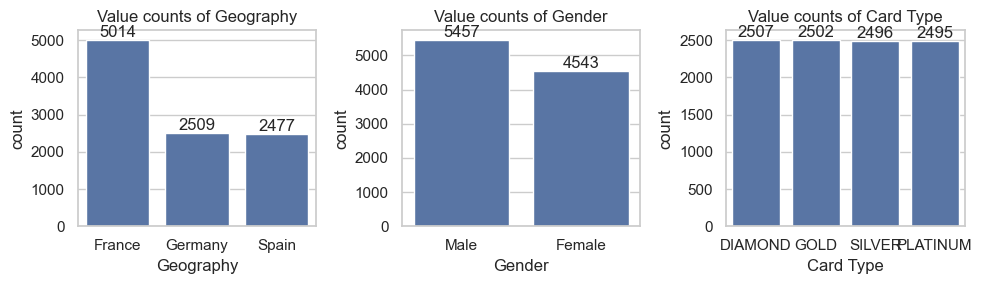

Numeric columns: ['Age', 'Tenure', 'CreditScore', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Satisfaction Score', 'Point Earned']


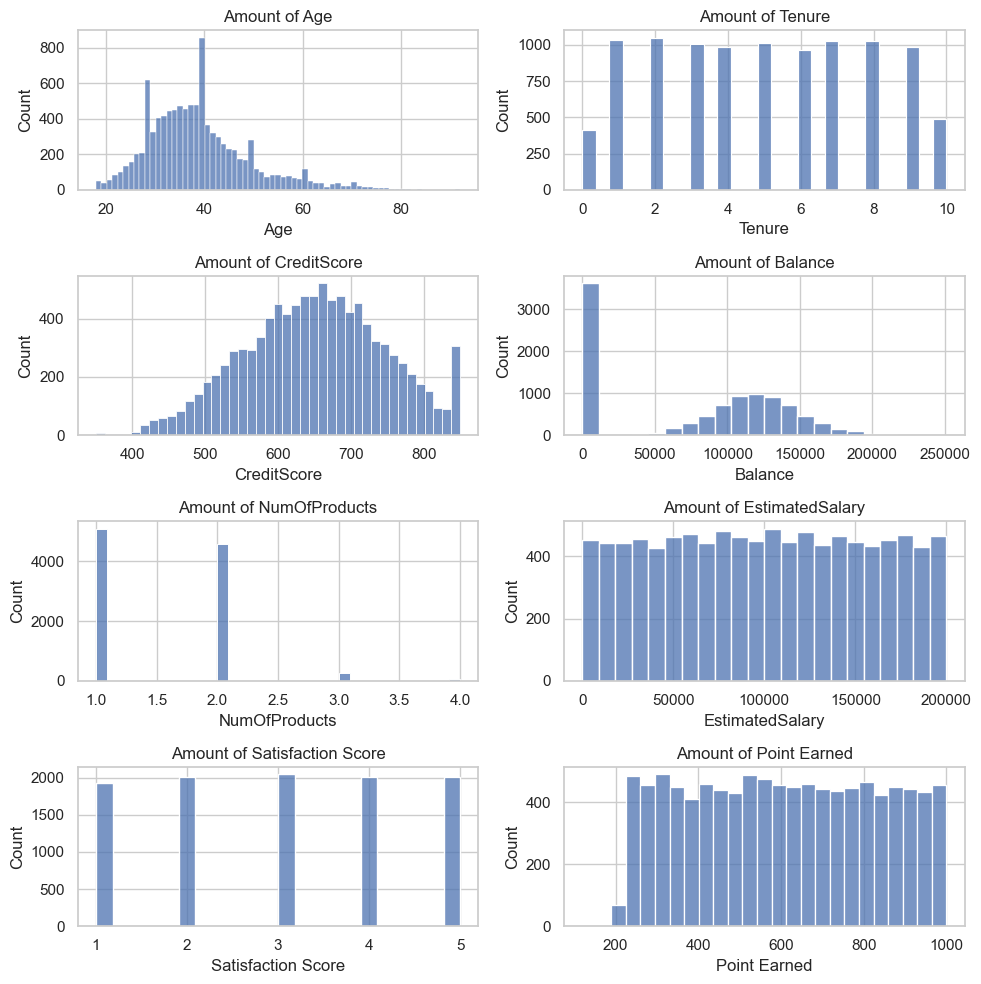

Binary columns: ['HasCrCard', 'IsActiveMember', 'Complain', 'Exited']


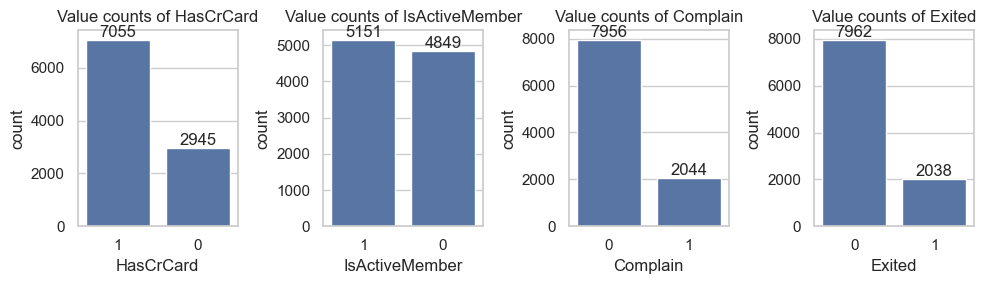

In [79]:
# list of data for graph
cat = ['Geography', 'Gender','Card Type']
nums = ['Age', 'Tenure', 'CreditScore', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Satisfaction Score', 'Point Earned']
binary = ['HasCrCard', 'IsActiveMember', 'Complain','Exited']

# visualize categorical, numeric and binary columns
print("Categorical columns:", cat)
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for i in cat:
    sns.countplot(x=i, data=df, order=df[i].value_counts().index, ax=axes[cat.index(i)])
    axes[cat.index(i)].set_title(f"Value counts of {i}")
    axes[cat.index(i)].bar_label(axes[cat.index(i)].containers[0])
plt.tight_layout()
plt.show()

print("Numeric columns:", nums)
fig, axes = plt.subplots(4, 2, figsize=(10, 10))
for j in nums:
    sns.histplot(x=j, data=df, kde=False , ax=axes[nums.index(j)//2, nums.index(j)%2])
    axes[nums.index(j)//2, nums.index(j)%2].set_title(f"Amount of {j}")
plt.tight_layout()
plt.show()

print("Binary columns:", binary)
fig, axes = plt.subplots(1, 4, figsize=(10, 3))
for k in binary:
    sns.countplot(x=k, data=df, order=df[k].value_counts().index, ax=axes[binary.index(k)])
    axes[binary.index(k)].set_title(f"Value counts of {k}")
    axes[binary.index(k)].bar_label(axes[binary.index(k)].containers[0])
plt.tight_layout()
plt.show()


สังเกตได้ว่าข้อมูลของลูกค้าส่วนใหญ่มีเงินคงเหลือ(Balance) เป็น 0

In [80]:
df['Balance'].value_counts()

Balance
0.00000         3617
130170.82000       2
105473.74000       2
113957.01000       1
85311.70000        1
                ... 
88381.21000        1
155060.41000       1
57369.61000        1
75075.31000        1
116363.37000       1
Name: count, Length: 6382, dtype: int64

In [81]:
no_balance = df.loc[df['Balance'] == 0]
have_balance = df.loc[df['Balance'] != 0]

In [82]:
no_balance.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,3617.00000,3617.00000,3617.00000,3617.00000,3617.00000,3617.00000,3617.00000,3617.00000,3617.00000,3617.00000,3617.00000,3617.00000
mean,649.45286,38.43489,5.07133,0.00000,1.78463,0.71662,0.51783,98983.55955,0.13824,0.13851,3.00553,601.78131
std,96.15880,10.49200,2.86078,0.00000,0.49645,0.45070,0.49975,57730.82896,0.34520,0.34548,1.39629,225.41624
min,350.00000,18.00000,0.00000,0.00000,1.00000,0.00000,0.00000,90.07000,0.00000,0.00000,1.00000,119.00000
25%,583.00000,31.00000,3.00000,0.00000,1.00000,0.00000,0.00000,49506.82000,0.00000,0.00000,2.00000,409.00000
50%,651.00000,37.00000,5.00000,0.00000,2.00000,1.00000,1.00000,98618.79000,0.00000,0.00000,3.00000,594.00000
75%,717.00000,43.00000,7.00000,0.00000,2.00000,1.00000,1.00000,148330.97000,0.00000,0.00000,4.00000,795.00000
max,850.00000,88.00000,10.00000,0.00000,4.00000,1.00000,1.00000,199992.48000,1.00000,1.00000,5.00000,1000.00000


In [83]:
have_balance.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,6383.00000,6383.00000,6383.00000,6383.00000,6383.00000,6383.00000,6383.00000,6383.00000,6383.00000,6383.00000,6383.00000,6383.00000
mean,651.13849,39.19771,4.97963,119827.49379,1.38603,0.69920,0.51355,100717.35296,0.24095,0.24174,3.01849,609.19756
std,96.93461,10.47621,2.90951,30095.05646,0.57701,0.45864,0.49986,57380.31658,0.42770,0.42817,1.41143,226.18620
min,350.00000,18.00000,0.00000,3768.69000,1.00000,0.00000,0.00000,11.58000,0.00000,0.00000,1.00000,163.00000
25%,584.00000,32.00000,2.00000,100181.97500,1.00000,0.00000,0.00000,51736.85000,0.00000,0.00000,2.00000,411.00000
50%,652.00000,38.00000,5.00000,119839.69000,1.00000,1.00000,1.00000,101139.30000,0.00000,0.00000,3.00000,611.00000
75%,718.00000,44.00000,8.00000,139512.29000,2.00000,1.00000,1.00000,149596.61500,0.00000,0.00000,4.00000,803.00000
max,850.00000,92.00000,10.00000,250898.09000,4.00000,1.00000,1.00000,199970.74000,1.00000,1.00000,5.00000,1000.00000


In [84]:
print(no_balance['Exited'].value_counts())
print(have_balance['Exited'].value_counts())
print(df['Exited'].value_counts())

Exited
0    3117
1     500
Name: count, dtype: int64
Exited
0    4845
1    1538
Name: count, dtype: int64
Exited
0    7962
1    2038
Name: count, dtype: int64


จะเห็นได้ว่าคนที่ Balance เป็น 0 มีเงินเดือน (EstimatedSalary) ที่ใกล้เคียงกับคนที่ Balance > 0 โดยดูจากค่าในแต่ละเปอร์เซนไทล์ และนอกจากนี้ยังพบว่าคนที่มีเงินในบัญชี กลับมีอัตราส่วนการเลิกใช้งานที่มากกว่า (ได้ไง?)

In [85]:
y = pd.Series(have_balance['Exited'])
x = pd.Series(have_balance['Balance'])

y.corr(x)

np.float64(0.016877600321914498)

ซึ่งก็จะเห็นได้ว่า Balance และ Target (Exited) ส่งผลต่อกันแบบในทิศทางเดียวกัน หรือก็คือยิ่งเงินในบัญชีเยอะ ยิ่งมีโอกาสที่จะเลิกใช้งาน ส่วนที่มีข้อมูลส่วนใหญ่เป็นคนที่ไม่มีเงินในบัญชีเลยก็สามารถเกิดขึ้นได้ ดังนั้นจึงไม่ได้แก้ไขข้อมูลส่วนนี้

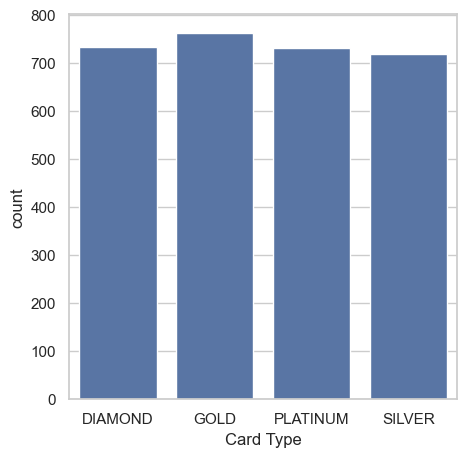

In [86]:
no_card =  df.loc[df['HasCrCard']==0]
fig, axes = plt.subplots(figsize=(5, 5))
sns.countplot(x = 'Card Type', data = no_card)
plt.show()

จากการลองทดลองปริ้นท์ออกมาดูว่าคนที่ไม่มีเครดิตการ์ดมีการ์ดชนิดอะไรบ้าง ก็พบว่าแต่ละคนมีชนิดการ์ดกันหมดเลย ซึ่งทั้งนี้เราไม่แน่ชัดว่าข้อมูลนี้บอกถึงชนิดของ credit หรือ debit card แต่เนื่องจากหากถ้าเป็น debit card จริง แสดงว่า ทุกคนต้องมี debit card หรือการ์ดอื่น ๆ นอกเหนือจากนี้ ซึ่งไม่มีข้อมูลนี้อยู่ในตาราง (แต่ก็เป็นไปได้) แต่หากเป็นเช่นนั้นจริงแสดงว่า
1. ทุกคนต้องมีการ์ดแบบเดียวกันหมดทุกคน (debit card หรืออื่น ๆ)
2. หากทุกคนไม่มีเหมือนกัน แต่ข้อมูลที่นำมาเป็นชนิดการ์ดจากหลาย ๆ การ์ด เช่น คนหนึ่งใช้ชนิดการ์ดอิงจาก credit card ส่วนอีกคนอิงจาก debit card หากเป็นเช่นนั้น ข้อมูลนี้ก็จะบอกอะไรเราไม่ได้เท่าไหร่ เพราะเราไม่รูเลยว่าแต่ละคนใช้ชนิดการ์ดอะไร เพราะแต่ละแบบก็มีสวัสดิการที่ต่างกัน ก็ส่งผลต่อการเลิกใช้ไม่เหมือนกัน แม้จะมีชนิดการ์ดเหมือนกัน
3. ในการพิจารณาข้อมูล เราไม่ควรให้เป็นไปตามข้อ 2. ดังนั้นสิ่งที่เราทำได้คือ การอุปมาว่าชนิดของการ์ดนั้นเป็นเครดิตการ์ดทุกคน และส่วนคนที่ไม่มีเครดิตการ์ดก็เปลี่ยนชนิดการ์ดเป็นชนิดของคนที่ไม่มีเครดิการ์ด หรืออีกวิธีคือการอุปมาว่าทุกคนใช้การ์ดแบบอื่น ซึ่งมีเหมือนกันทั้งหมด เช่น debit card และอื่น ๆ ซึ่งวิธีนี้ก็จะไม่ต้องแก้ไขข้อมูลอะไร แต่ในการทดสอบเก็บข้อมูลจากผู้ใช้ เราก็ต้องเพิ่มข้อมูลว่าผู้ใช้มี debit card ด้วยหรือไม่ ซึ่งทำให้โมเดลที่เทรนมาใช้ได้แค่กับคนที่มี debit card เท่านั้น
ดังนั้นในการเลือกวิธีแก้ปัญหา จะขอเลือกเป็นการเพิ่มชนิดการ์ดใหม่ เป็นของคนที่ไม่มี credit card โดยเฉพาะ และอุปมาว่าชนิดการ์ดตาม dataset คือชนิดของ credit card

In [87]:
df.loc[df['HasCrCard'] == 0, 'Card Type'] = 'Nocard'

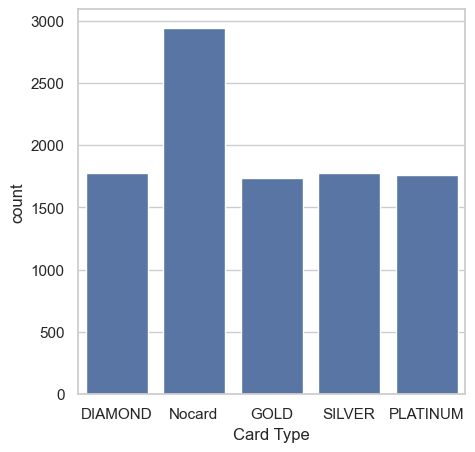

In [88]:
fig, axes = plt.subplots(figsize=(5, 5))
sns.countplot(x = 'Card Type', data = df)
plt.show()

ตอนนี้เราก็ได้เพิ่ม Card Type มาอีกอันนึงแล้วคือ "Nocard" ซึ่งจะอยู่ในเฉพาะคนที่ไม่มีเครดิตการ์ดเท่านั้น

และจากคำอธิบาย Dataset ที่ได้มาทำให้เราพบว่า Point Earned มาจากการใช้ Credit Card ดังนั้นเราจะต้องทำให้คนที่ไม่มี Credit Card ทุกคนมี Point Earned เป็น 0

In [89]:
df.loc[df['HasCrCard'] == 0, 'Point Earned'] = 0

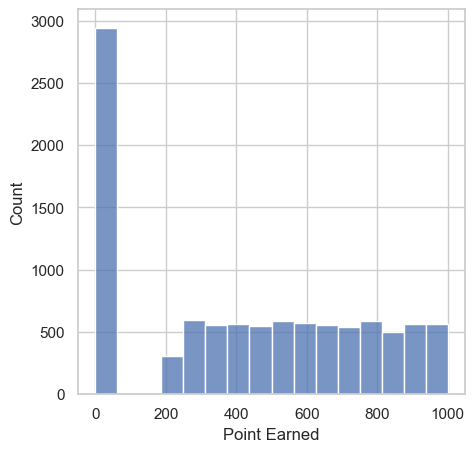

In [90]:
fig, axes = plt.subplots(figsize=(5, 5))
sns.histplot(x = 'Point Earned', data = df)
plt.show()

นอกจากนี้จากข้อมูลที่เราได้ทำ count plot ไปเราจะพบได้ว่าหลายคนมีเงินเดือนที่น้อยมาก (เริ่มตั้งแต่ 11 ขึ้นไป ซึ่งอาจเป็นหน่วย euro ตามประเทศที่มีใน dataset) ซึ่งน้อยกว่ารายได้ขั้นต่ำของยุโรปมาก (ประมาณ 500-700 ต่อเดือน แล้วแต่ประเทศ) ทั้งนี้เราอาจมองได้ว่าเป็นบุคคลที่ยังอยู่ในสถานะว่างงาน ดังนั้นจึงจะไม่ได้แก้ไขข้อมูลส่วนนี้ แต่ถือว่าเป็นข้อสังเกตหนึ่งที่พบได้

Distribution of each feature by target


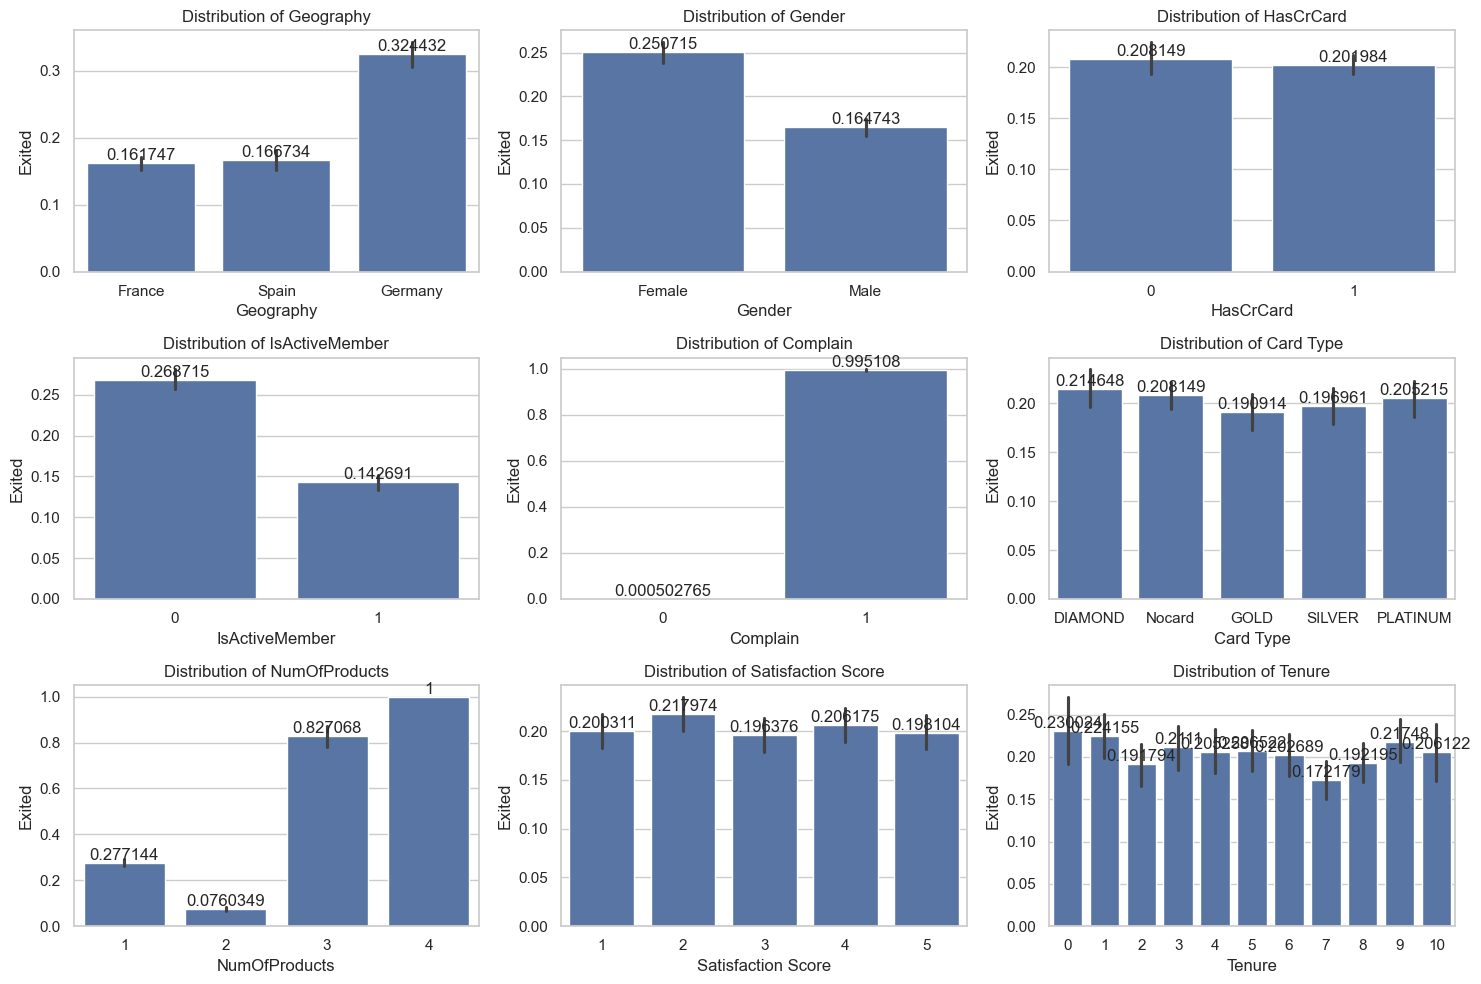

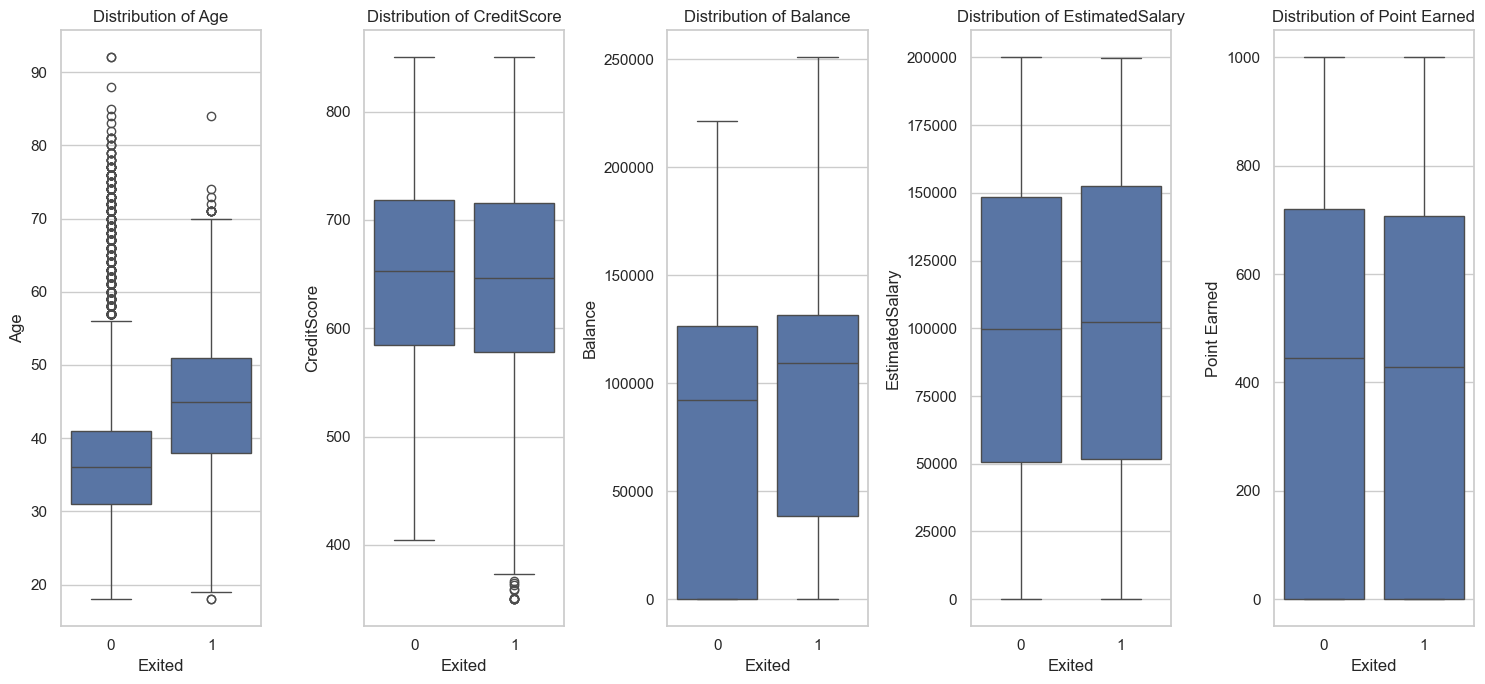

In [91]:
# visualize churn rate of each by target
# for bar plot it tells that how many people Exited in each category (in term of average)
# for box plot it tells that how the distribution of numeric feature is for each category of target
print("Distribution of each feature by target")

barlot = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Complain', 'Card Type', 'NumOfProducts', 'Satisfaction Score', 'Tenure']
boxlot = ['Age', 'CreditScore', 'Balance', 'EstimatedSalary', 'Point Earned']

fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for i in barlot:
    sns.barplot(x=i, y='Exited', data=df, ax=axes[barlot.index(i)//3, barlot.index(i)%3])
    axes[barlot.index(i)//3, barlot.index(i)%3].set_title(f"Distribution of {i}")
    axes[barlot.index(i)//3, barlot.index(i)%3].bar_label(axes[barlot.index(i)//3, barlot.index(i)%3].containers[0])
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 5, figsize=(15, 7))

for j in boxlot:
    sns.boxplot(x='Exited', y=j, data=df, ax=axes[boxlot.index(j)])
    axes[boxlot.index(j)].set_title(f"Distribution of {j}")
plt.tight_layout()
plt.show()

จากข้อมูลจะเห็นได้ว่าการร้องเรียน (Complain) คนแทบทั้งหมดที่ร้องเรียนจะเลิกใช้ธนาคาร ในขณะที่คนที่ไม่ร้องเรียนแทบทั้งหมดก็ไม่เลิกใช้ธนาคารเช่นกัน

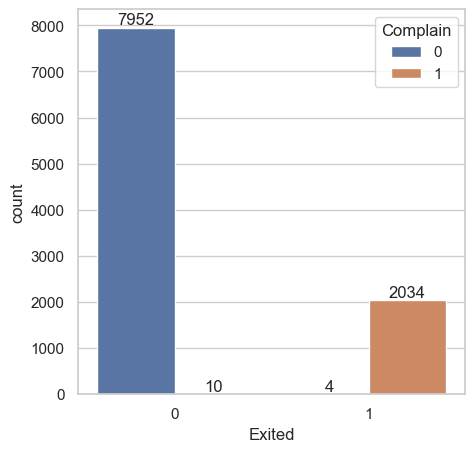

In [92]:
# Check on Complain data by target
fig, axes = plt.subplots(figsize=(5,5))
sns.countplot(x='Exited', hue='Complain', data=df)
for container in axes.containers:
    axes.bar_label(container)

นอกจากนี้ จากข้อมูลจะเห็นได้ว่าข้อมูลอายุมี Outlier ของกลุ่มคนที่ไม่เลิกใช้ธนาคารค่อนข้างเยอะ ผมจึงจะตรวจสอบข้อมูลส่วนนี้ดู

In [93]:
# Check on Age because of outliers seen in boxplot
for i in df['Exited'].unique():
    print(f"Statistics for Exited = {i}")
    print(df[df['Exited'] == i]['Age'].describe())

Statistics for Exited = 1
count   2038.00000
mean      44.83562
std        9.75975
min       18.00000
25%       38.00000
50%       45.00000
75%       51.00000
max       84.00000
Name: Age, dtype: float64
Statistics for Exited = 0
count   7962.00000
mean      37.40806
std       10.12596
min       18.00000
25%       31.00000
50%       36.00000
75%       41.00000
max       92.00000
Name: Age, dtype: float64


พบว่าข้อมูลดูไม่ได้มีอะไรที่ผิดพลาด (คนอายุเยอะเกิน/ น้อยเกิน) ดังนั้นจึงไม่ต้องพิจารณาการตัดข้อมูลส่วนผิดพลาด

In [94]:
# Count outliers in Age feature for each target class
for j in range(2):
    mean = df[df['Exited'] == j]['Age'].mean()
    std = df[df['Exited'] == j]['Age'].std()
    cnt = 0
    for i in df[df['Exited'] == j]['Age']:
        if ((i-mean)/std > 4):
            #print(i)
            cnt += 1
    print("for Exited =", j ,"cnt = ",cnt)

for Exited = 0 cnt =  23
for Exited = 1 cnt =  1


จาก Z score จะเห็นได้ว่ามีกว่า 23 คน ของกลุ่มคนที่ไม่เลิกใช้ธนาคาร ที่ถือว่าเป็น Outlier ที่ค่อนข้างสูง (Z score > 4) ซึ่งทั้งนี้จะนำไปตัดออกตอนที่เลือกชุดการ Train model

In [95]:
df['StartAge'] = df['Age'] - df['Tenure']

df['StartAge'].describe()

count   10000.00000
mean       33.90900
std        10.90712
min         8.00000
25%        27.00000
50%        32.00000
75%        39.00000
max        91.00000
Name: StartAge, dtype: float64

ส่วนนี้จะเป็นการเพิ่มข้อมูลอายุที่เริ่มสมัครธนาคาร
ซึ่งสังเกตได้ว่าคนที่เริ่มใช้ธนาคารมีตั้งแต่อายุ 8 ปี ถึง 91 ปี ซึ่งเป็นไปได้หากคนที่มีอายุน้อยกว่าตามธนาคารกำหนด (ประมาณ 16-18) แต่มีผู้ปกครองเป็นพยานในการสมัครก็สามารถทำได้ และในการถือครองเครดิตการ์ด เนื่องจากเราไม่รู้ว่าเริ่มถือครองที่อายุเท่าไหร่ แต่หากอิงจากข้อมูลก็จะเห็นได้ว่าทุกคนในขณะนั้นอายุตั้งแต่ 18 ปีขึ้นไปทั้งหมด เพราะฉะนั้นก็เป็นไปได้ว่าคนที่ถือเครดิตการ์ดอาจจะสมัครตั้งแต่อายุ 18 ปีเป็นต้นไปทุกคน หรือก็คือไม่มีข้อมูลไหนที่ดูจะผิดพลาดในส่วนนี้

## Correlation

Correlation of each feature with target
Complain: 0.99444
Age: 0.30151
StartAge: 0.29140
Geography: 0.14788
Gender: 0.11252
NumOfProducts: 0.07828
Balance: 0.01688
EstimatedSalary: 0.00691
Card Type: -0.00053
Tenure: -0.00071
Point Earned: -0.00146
HasCrCard: -0.00189
Satisfaction Score: -0.00946
CreditScore: -0.03034
IsActiveMember: -0.17212


Text(0.5, 1.0, 'Correlation of each feature with target')

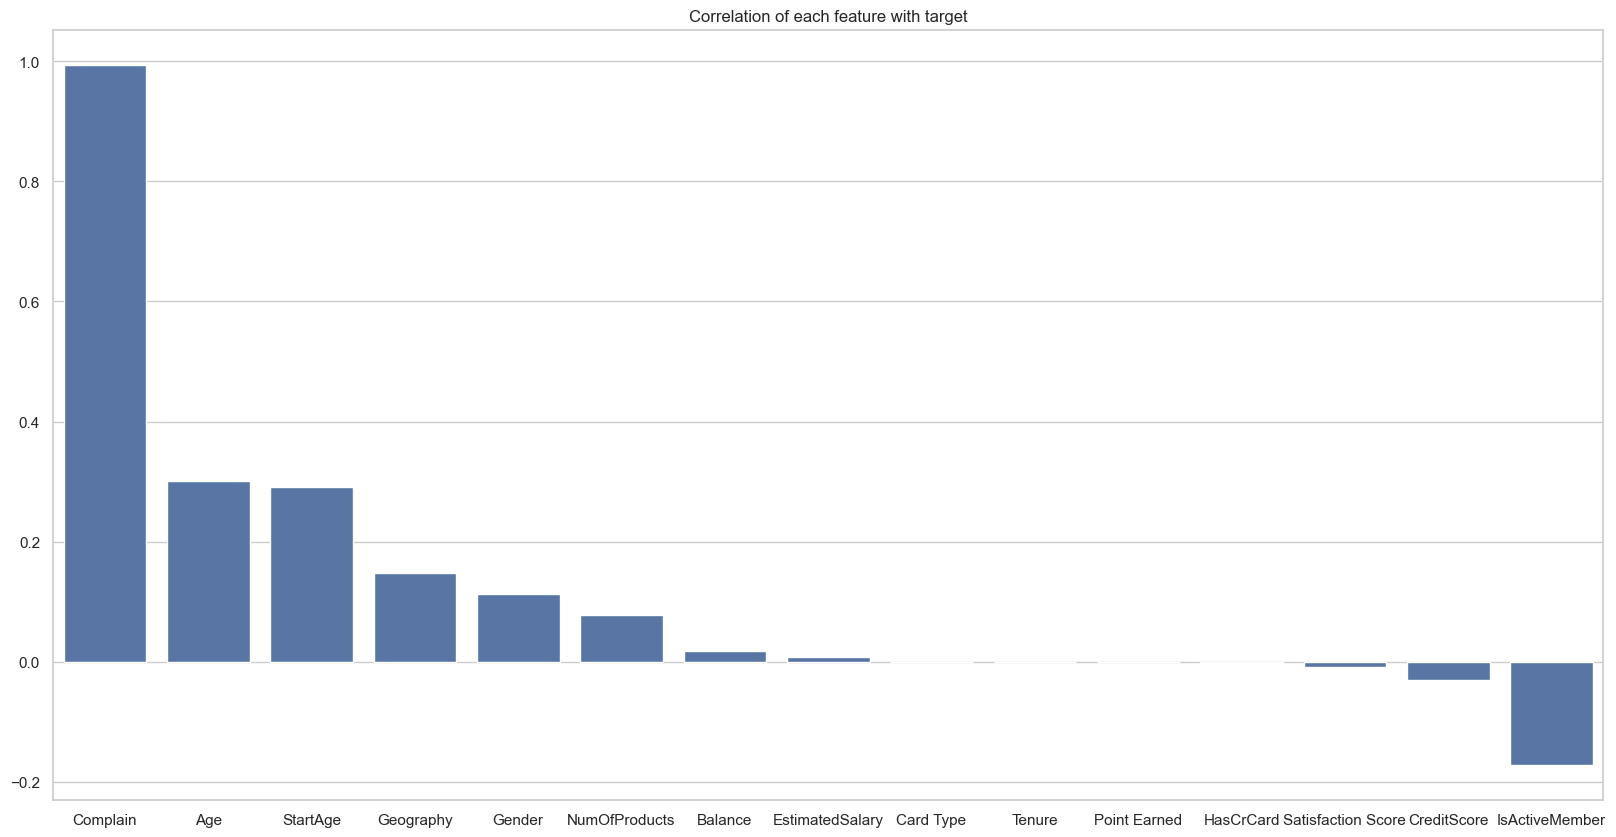

In [96]:
# Map categorical data to numerical data for correlation calculation
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Geography'] = df['Geography'].map({'France': 0, 'Spain': 1, 'Germany': 2})
df['Card Type'] = df['Card Type'].map({'DIAMOND': 0, 'GOLD': 1, 'SILVER': 2, 'PLATINUM': 3, 'Nocard': 4})

# Correlation of each feature with target
print("Correlation of each feature with target")
features = ['CreditScore', 'Geography','Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Complain', 'Satisfaction Score', 'Card Type', 'Point Earned', 'StartAge']
res = []
for i in features:
    x = pd.Series(df[i])
    correlation = y.corr(x)
    res.append((i,float(correlation)))
res = sorted(res, key=lambda x: x[1], reverse=True)
for i in res:
    print(f"{i[0]}: {i[1]:.5f}")

# plot correlation bar graph
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x=[i[0] for i in res], y=[i[1] for i in res], ax=ax)
ax.set_title("Correlation of each feature with target")


เช็คอีกรอบหลังจากเปลี่ยนข้อมูลจากประเภทพวก category เป็นตัวเลข ว่ามีข้อมูลไหนที่ขาดไปไหม

In [97]:
df.isnull().sum()

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
StartAge              0
dtype: int64

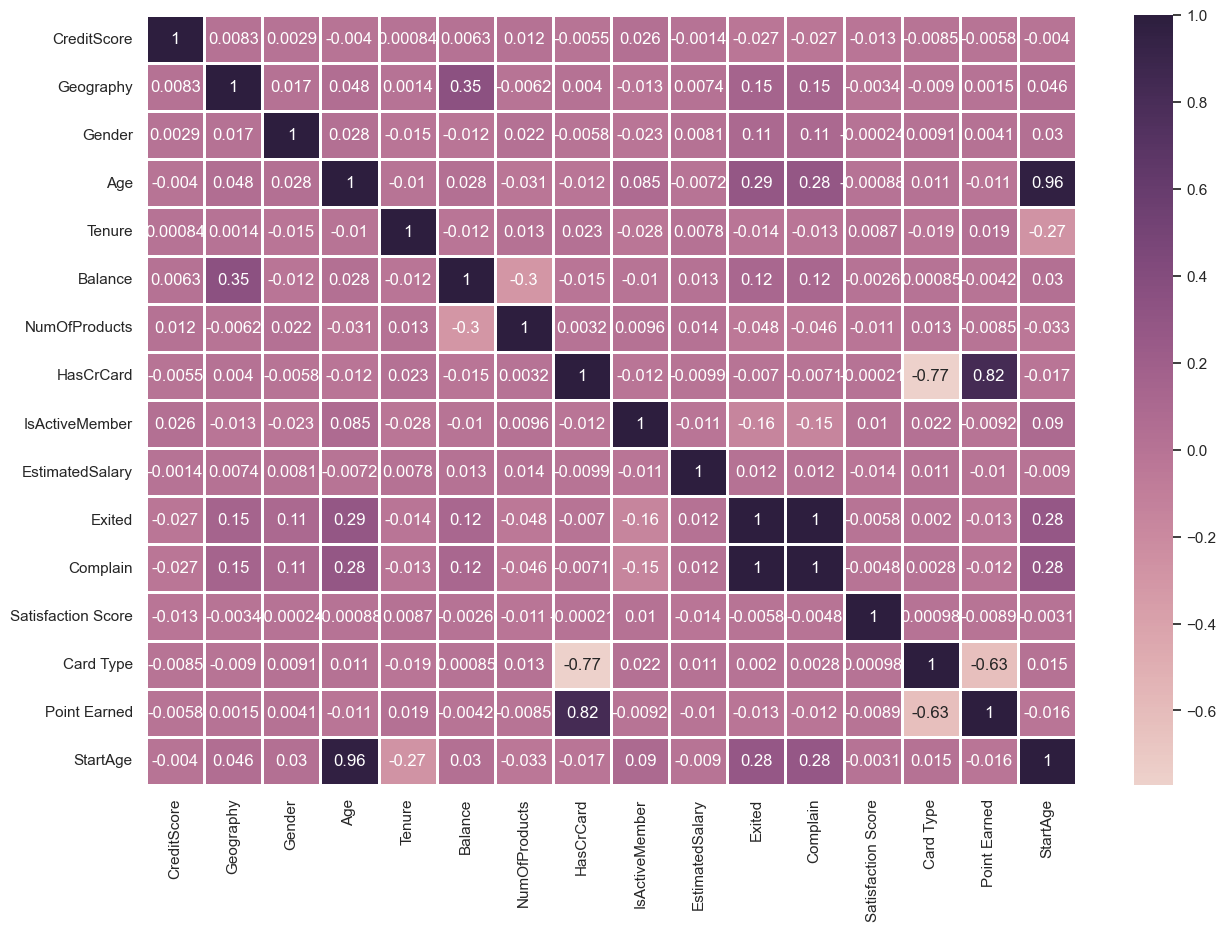

In [98]:
# Correlation of each feature with target
fig, ax = plt.subplots(figsize=(15, 10))

numer = df.select_dtypes(exclude=['object'])
corr_matrix = numer.corr()
sns.heatmap(corr_matrix, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), linewidths=1)

plt.show()

จากกราฟ heatmap ที่แสดงความสัมพันธ์ของข้อมูล ก็จะเห็นได้ว่าการมี Complain มีความสัมพันธ์กับการเลิกใช้ธนาคาร (Exited) อย่างมาก (เข้าใกล้ 1 มาก ๆ ) และยังมีข้อมูลอื่น ๆ เช่น อายุ เงินคงเหลือในบัญชี ที่ก็มีความสัมพันธ์กับการเลิกใช้ธนาคารในทิศทางเดียวกัน หรือบางข้อมูลก็มีความสัมพันธ์ที่ตรงข้ามกัน เช่น เงินคงเหลือในบัญชีกับจำนวนสินค้าที่ซื้อกับธนาคาร

# Modeling 🤖

## Training

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score
import joblib
import os

x = df[features]
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)

z_del = [i for i in X_train.columns if i not in cat]
# print(z_del)

cop = X_train[z_del].astype(float).copy()
mean = cop.mean()
std = cop.std(ddof=0).replace(0, np.nan)
Z = (cop - mean) / std
remain = (Z.abs() <= 4).all(axis=1)

X_train = X_train.loc[remain].copy()
y_train = y_train.loc[remain].copy()

print(X_train.shape, y_train.shape)

(8000, 15) (8000,)
(7948, 15) (7948,)


ลองปริ้นท์ออกมาดูว่าหลังตัด Outlier จาก trin set ออกไปแล้วเหลือข้อมูลเท่าไหร่บ้าง

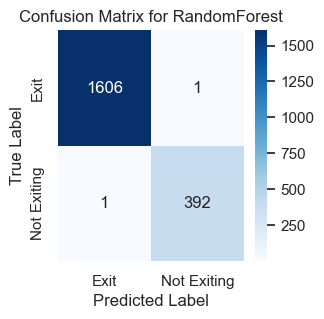

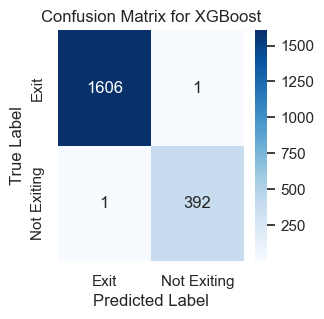

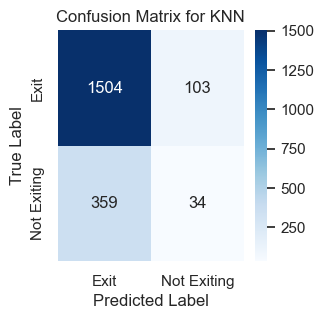

          Model  Accuracy      F1  ROC-AUC
0  RandomForest   0.99900 0.99746  0.99950
1       XGBoost   0.99900 0.99746  0.99843
2           KNN   0.76900 0.12830  0.54023


In [100]:
model = {
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1),
    "XGBoost": XGBClassifier(n_estimators=1000, random_state=42, n_jobs=-1),
    "KNN" : KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
}

res = []

for n,i in model.items():
    i.fit(X_train, y_train)
    y_pred = i.predict(X_test)
    accu = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    rocauc = roc_auc_score(y_test, i.predict_proba(X_test)[:, 1])
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(3, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Exit', 'Not Exiting'], yticklabels=['Exit', 'Not Exiting'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for {n}')
    plt.show()
    res.append({'Model' : n, 'Accuracy' : accu, 'F1' : f1, 'ROC-AUC' : rocauc})
    target_folder = "models"
    filename = f"bank_churn_{n}.pkl"
    full_path = os.path.join(target_folder, filename)
    joblib.dump(i,full_path)

res = pd.DataFrame(res).reset_index(drop=True)
print(res)


จากการทดลองทดสอบโมเดลทั้ง 3 แบบสำหรับการ classify ตาม Target ก็พบว่า Random forest ทำได้ดีที่สุด เทียบกับอีก 2 ตัว 

## Example Testing

In [101]:
# Load Model
target_folder = "models"
filename = f"bank_churn_RandomForest.pkl"
full_path = os.path.join(target_folder, filename)
model = joblib.load(full_path)

In [102]:
# Testing Customer Data
Customer = pd.DataFrame({
    'Surname'           :      ['NongKen'],
    'CustomerId'        :      [101010101],
    'CreditScore'       :      [600],
    'Geography'         :      ['Germany'],
    'Gender'            :      ['Female'],
    'Age'               :      [50],
    'Tenure'            :      [0],
    'Balance'           :      [200000],
    'NumOfProducts'     :      [3],
    'HasCrCard'         :      [0],
    'IsActiveMember'    :      [0],
    'EstimatedSalary'   :      [20000],
    'Complain'          :      [0],
    'Satisfaction Score':      [2],
    'Card Type'         :      ['SILVER'],
    'Point Earned'      :      [500],
})

# Preprocess Customer Data
for i in Customer:
    if i not in features:
        Customer = Customer.drop(columns=[i])

Customer.loc[Customer['HasCrCard'] == 0, 'Card Type'] = 'Nocard'
Customer.loc[Customer['HasCrCard'] == 0, 'Point Earned'] = 0

Customer['Gender'] = Customer['Gender'].map({'Male': 0, 'Female': 1})
Customer['Geography'] = Customer['Geography'].map({'France': 0, 'Spain': 1, 'Germany': 2})
Customer['Card Type'] = Customer['Card Type'].map({'DIAMOND': 0, 'GOLD': 1, 'SILVER': 2, 'PLATINUM': 3, 'Nocard': 4})
Customer['StartAge'] = Customer['Age'] - Customer['Tenure']

Customer

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,StartAge
0,600,2,1,50,0,200000,3,0,0,20000,0,2,4,0,50


In [103]:
# Make Prediction
prediction = model.predict_proba(Customer)
print(f'Probability of Exiting: {prediction[0][1]*100:.2f}%')
print(f'Probability of Not Exiting: {prediction[0][0]*100:.2f}%')
res = model.predict(Customer)[0]
print(f'Prediction : {"Exiting" if res == 1 else "Not Exiting"}')

Probability of Exiting: 19.00%
Probability of Not Exiting: 81.00%
Prediction : Not Exiting
